# Price Optimizaiton based on price elasticity of Demand

# Price Elasticity

# EDA - Sell Dataset

In [2]:
# Imoprt the required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [3]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#  Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
# Display all rows and columns of a dataframe instead of truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
sold = pd.read_csv('data/Cafe_Sell_Meta_Data.csv')
transcation = pd.read_csv('data/Cafe_Transaction_Store.csv')
date_info = pd.read_csv('data/Cafe_DateInfo.csv')

In [6]:
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [7]:
sold.describe()
sold.describe(include = ['O'])

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [8]:
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


SELL_ID: a categorical variable, idenitifier of the combination of items that is contained in the product

SELL_CATEGORY: "0" identifies single products; "2" identiifies the combination of products

ITEM_ID: a categorical variable, identifier of the item that is contained in the product

ITEM_NAME: a categorical variale, identifying the name of the item

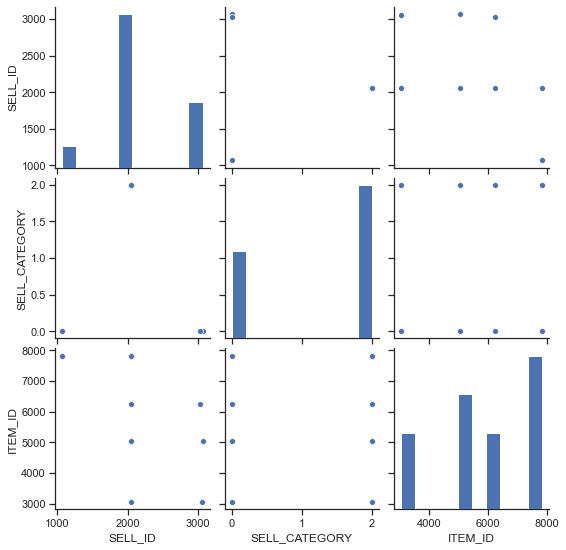

In [9]:
sns.pairplot(sold)

# EDA Transaction

In [10]:
transcation.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [11]:
transcation.describe()
transcation.describe(include = ['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [12]:
transcation[transcation.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


Impotant: It is assumed the PRICE for that product in that day will not vary

In details:

CALENDER_DATE: a date/time variable, haveing the time always set to 00:00 AM

PRICE: a numeric variable, associated with the price of the product indentified by the SELL_ID

QUANTITY: a numeric variable, associated with the quantity of the product sold, identified by the SELL_ID

SELL_ID: a categorical variable, identifier of the product sold

SELL_CATEGORY: a categorical variable, category of the product sold

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

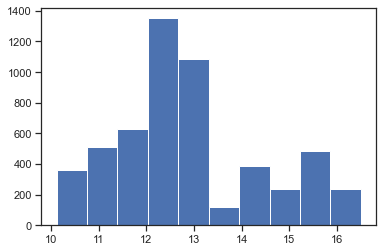

In [13]:
plt.hist(transcation.PRICE)

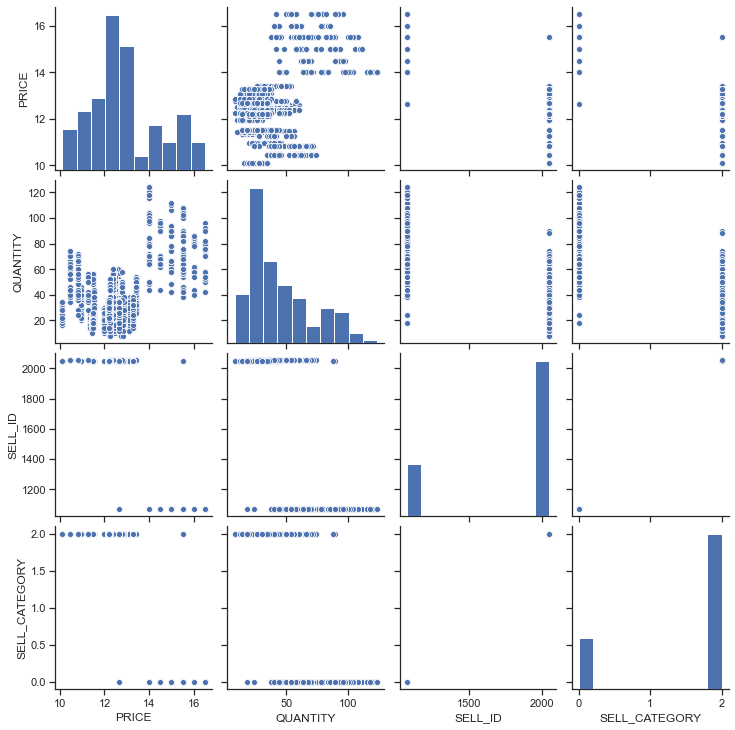

In [14]:
sns.pairplot(transcation)

# EDA Date Info

In [15]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [16]:
date_info.describe()
date_info.describe(include = ['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [17]:
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [18]:
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0
8,1/9/12,2012,NaN,0,0,23.0,0
9,1/10/12,2012,NaN,0,0,24.8,0
10,1/11/12,2012,NaN,0,0,21.2,0
11,1/12/12,2012,NaN,0,0,24.8,0
12,1/13/12,2012,NaN,0,0,26.6,0


In [19]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")

In [20]:
date_info

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0
5,1/6/12,2012,No Holiday,0,0,23.0,0
6,1/7/12,2012,No Holiday,1,0,26.6,0
7,1/8/12,2012,No Holiday,1,0,26.6,0
8,1/9/12,2012,No Holiday,0,0,23.0,0
9,1/10/12,2012,No Holiday,0,0,24.8,0


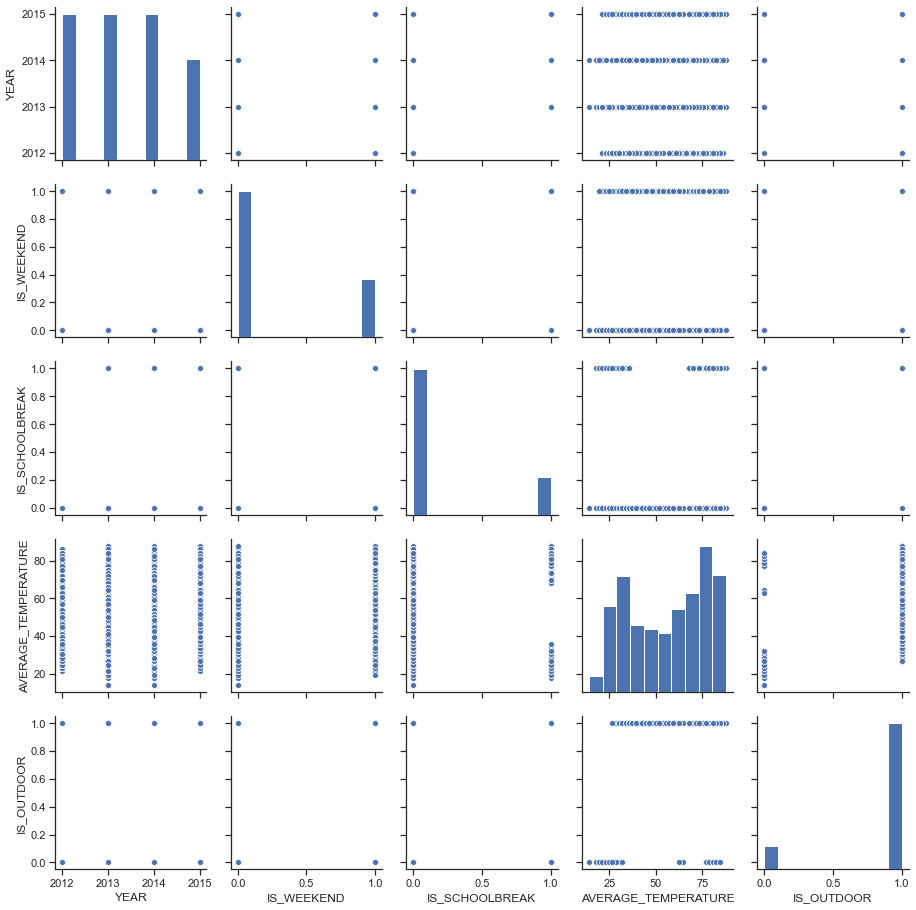

In [21]:
sns.pairplot(date_info)

# Understanding the data better

In [23]:
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [25]:
date_info['CALENDAR_DATE'].min()

'1/1/12'

In [26]:
date_info['CALENDAR_DATE'].max()

'9/9/15'

In [27]:
date_info.shape

(1349, 7)

In [28]:
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [29]:
#-------------------------------------------------------------------------------------------------------

In [32]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [39]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [43]:
data1=pd.merge(sold.drop(['ITEM_ID'],axis=1), transcation.drop(['SELL_CATEGORY'], axis=1), on = 'SELL_ID')
data1.head(20)
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE', 'PRICE']).QUANTITY.sum()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104
5,1070,0,BURGER,01/06/12,15.5,100
6,1070,0,BURGER,01/07/12,15.5,70
7,1070,0,BURGER,01/08/12,15.5,70
8,1070,0,BURGER,01/09/12,15.5,106
9,1070,0,BURGER,01/10/12,15.5,108


In [53]:
b

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.50     46
                                   01/01/13       15.50     60
                                   01/01/14       15.50     72
                                   01/01/15       14.00     66
                                   01/02/12       15.50     70
                                   01/02/13       15.50     68
                                   01/02/14       15.50     76
                                   01/02/15       14.00    102
                                   01/03/12       15.50     62
                                   01/03/13       15.50     70
                                   01/03/14       15.50     68
                                   01/03/15       14.00     68
                                   01/04/12       15.50     88
                                   01/04/13       15.50    100
                                   01/04/14       15.50     74

In [46]:
data1.shape
intermediate_data = b.reset_index()

(10808, 6)

In [48]:
data1.shape

(10808, 6)

In [49]:
b.shape

(10792,)

In [50]:
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [51]:
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

In [52]:
combined_data = pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
